In [256]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import warnings
warnings.filterwarnings("ignore")

In [257]:
#importing the dataset
df=pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
print("There are",df.shape[0],"rows in the dataset and",df.shape[1],"columns in the dataset.")

There are 907 rows in the dataset and 27 columns in the dataset.


In [259]:
#checking null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Here we can see columns 'owner' and 'commissioning_year' are having lots of null value. We can't simply impute any values into these columns. So its better to remove them for further prediction.

In [260]:
df.drop(['owner','commissioning_year'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


We can see there are certain columns having complete null values which means there is no analysis done on these columns, so its better to remove them.

In [261]:
#Deleting unnecessary rows 
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
           'generation_gwh_2019','estimated_generation_gwh'], axis=1, inplace=True)

In [262]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


Here we can see there is a column named URL, which is not that much necessary for model building, so lets drop it.

In [263]:
df.drop('url',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


Above are two columns country and country_long, which represents the name of the country. As we clearly know this dataset is of India only, so no need of keeping these two columns. Lets drop them.

In [264]:
df.drop(["country",'country_long'],axis=1,inplace=True)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


From above we can see there are 5 columns generation_gwh for 5 different years. We can keep the 2018 as it is close to current year and delete the rest.

In [265]:
df.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis=1,inplace=True)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,7279.000000,Central Electricity Authority


In [266]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,7279.000000,Central Electricity Authority


Here the column gppd_idnr is id for the powerplant, we do not need this data for modelling. So lets drop it as well.

In [267]:
df.drop('gppd_idnr',axis=1,inplace=True)
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,7279.000000,Central Electricity Authority


In [268]:
df.tail()

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_data_source
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,2019.0,686.5,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,CDM,WRI,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,NaN,NaN,NaN
906,iEnergy Theni Wind Farm,16.5,9.9344,77.4768,Wind,CDM,WRI,NaN,NaN,NaN


Now from this final dataset we can say there are certain columns like 'name', 'year_of_capacity_data','generation_data_source','source' are present which are not required at all for model building, so lets consider dropping these columns after some further analysis.

In [269]:
#Lets check the value_counts of each object column to proceed any further
cat_col=[]
for i in df.dtypes.index:
    if df[i].dtypes==object:
        cat_col.append(i)
print(cat_col)

['name', 'primary_fuel', 'source', 'geolocation_source', 'generation_data_source']


In [270]:
for i in cat_col:
    print(df[i].value_counts())
    print("\n")

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy l

So from above we can see there is no categorical value present in the column 'name', so we can surely go ahead with dropping this columns, lets analyze further more.

In [271]:
#checking null values in the categorical columns
for i in cat_col:
    print("Null values in",i,"=",df[i].isnull().sum())

Null values in name = 0
Null values in primary_fuel = 0
Null values in source = 0
Null values in geolocation_source = 19
Null values in generation_data_source = 458


Here we can see there are lots of null values present in the column 'generation_data_source', so we will not reach at any good decision if we simply impute any value in these missing columns. So we can consider dropping this column. And the column 'geolocation_source' is also having null values but very minimum, so we can impute values in it and it is having categorical values also.

In [272]:
df.drop(['name','generation_data_source'],axis=1,inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,7279.000000


Lets analyze one more column 'year_of_capacity_data' before finalizing our dataset.

In [273]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [274]:
df['year_of_capacity_data'].isnull().sum()

388

From the above two analysis we can see there are 519 values in the column having same value and 388 values are missing, so taking the MODE method into consideration for categorical value we can conclude this column is only for year 2019. As it is same for all rows we can drop this for clear prediction.

In [275]:
df.drop('year_of_capacity_data',axis=1,inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN
2,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,7279.000000


So this is our final dataset.

In [276]:
#Imputing missing values with some value
#Here we are using MODE as it is a categorical column
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['geolocation_source'].isnull().sum()

0

Here there are no null values in the column.

In [277]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN
2,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,7279.000000


In [278]:
df['generation_gwh_2018'].isnull().sum()

459

Here 459 rows are having null values, so imputing any value like 'mean of column' will not help us in getting a correct model. So lets just impute value as 0.

In [279]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(value=0)
df['generation_gwh_2018'].isnull().sum()

0

So we can see null values are removed.

In [280]:
#Checking if any null values left in any column
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
source                  0
geolocation_source      0
generation_gwh_2018     0
dtype: int64

We can see 'latitude' and 'longitude' are having only 46 rows of null values. So lets remove these null values with mean values of the column as these are numerical columns.

In [281]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,0.000000
2,39.2,21.9038,69.3732,Wind,CDM,WRI,0.000000
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,7279.000000


In [282]:
#Checking for null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2018    0
dtype: int64

Now there are no more missing values. So lets continue with this dataset for further analysis.

In [283]:
#Final dataset
df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,0.000000
2,39.2,21.9038,69.3732,Wind,CDM,WRI,0.000000
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,7279.000000
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,686.500000
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,0.000000
904,25.5,15.2758,75.5811,Wind,CDM,WRI,0.000000
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,0.000000


# Description

In [284]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1284.630911
std,590.085456,6.079148,4.812291,3298.251107
min,0.000000,8.168900,68.644700,0.000000
25%,16.725000,17.072000,74.388900,0.000000
50%,59.200000,21.281800,76.979200,0.000000
75%,385.250000,25.176450,79.206100,687.754000
max,4760.000000,34.649000,95.408000,35136.000000


Here we can say that there are outliers and skewness present in this dataset.

In [285]:
#Description of categorical columns
df.describe(include='O')

,primary_fuel,source,geolocation_source
count,907,907,907
unique,8,191,3
top,Coal,Central Electricity Authority,WRI
freq,258,519,784


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2018  907 non-null    float64
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


# Visualization

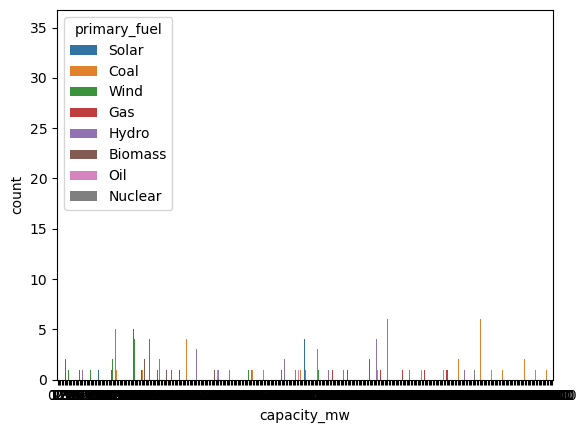

In [287]:
sns.countplot(hue=df.primary_fuel,x=df.capacity_mw)
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

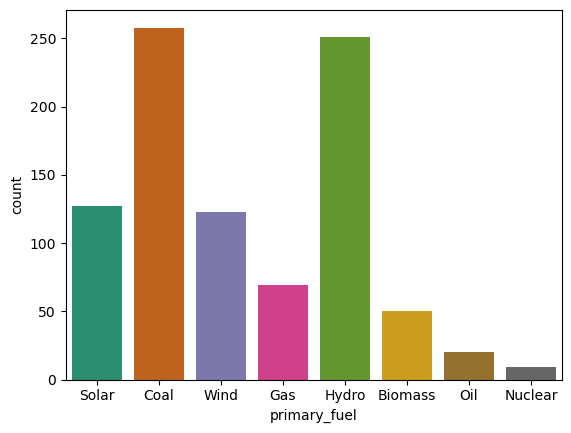

In [288]:
sns.countplot(df.primary_fuel,palette='Dark2')

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

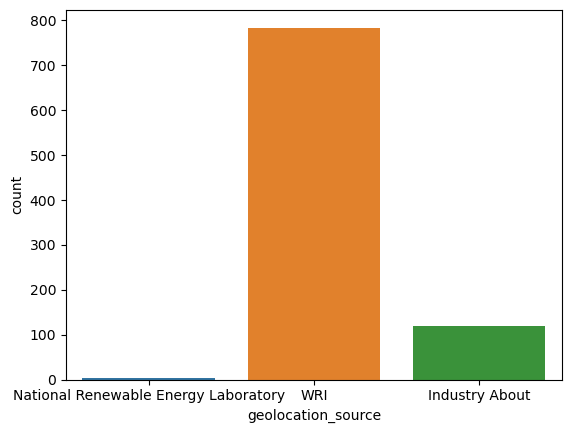

In [289]:
sns.countplot(df.geolocation_source)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2018  907 non-null    float64
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


<AxesSubplot:xlabel='latitude', ylabel='Count'>

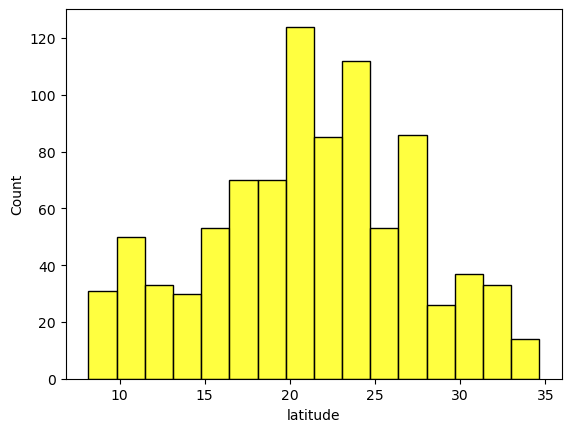

In [291]:
sns.histplot(df.latitude,color='yellow',kde=False)

([<matplotlib.patches.Wedge at 0x2b9c5596e50>,
 [Text(0.6892377669074882, 0.8572930074766616, 'Coal'),
  Text(-0.9731832102764016, 0.5127518300660832, 'Hydro'),
  Text(-0.7469255087076756, -0.8075285037952407, 'Solar'),
  Text(0.1311356246113944, -1.0921554138298173, 'Wind'),
  Text(0.7771437230435309, -0.7784906124893478, 'Gas'),
  Text(1.0239280225848488, -0.40195945637026825, 'Biomass'),
  Text(1.0904854710578697, -0.14436563791877993, 'Oil'),
  Text(1.0994655650966292, -0.03428514498657132, 'Nuclear')])

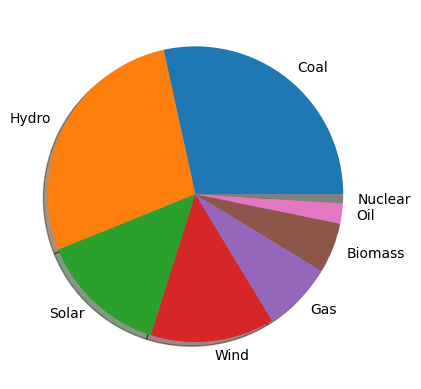

In [292]:
plt.pie(df['primary_fuel'].value_counts(),labels=['Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'],shadow=True)

<AxesSubplot:ylabel='longitude'>

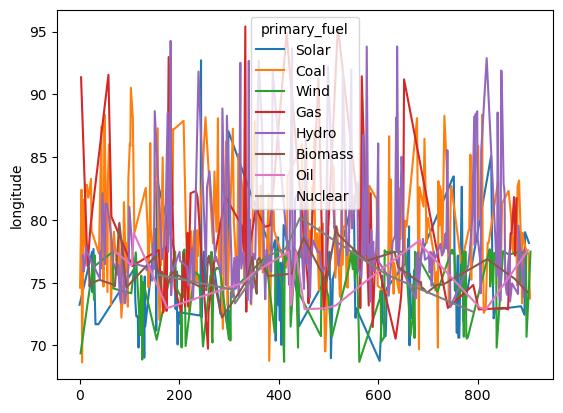

In [293]:
sns.lineplot(x=df.index,y=df['longitude'],data=df,hue='primary_fuel')

<AxesSubplot:ylabel='latitude'>

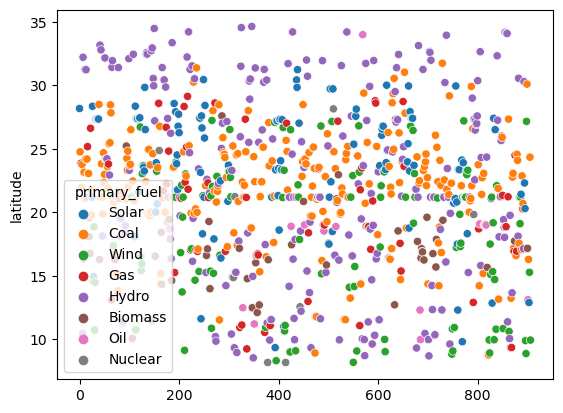

In [294]:
sns.scatterplot(x=df.index,y=df['latitude'],hue=df['primary_fuel'])

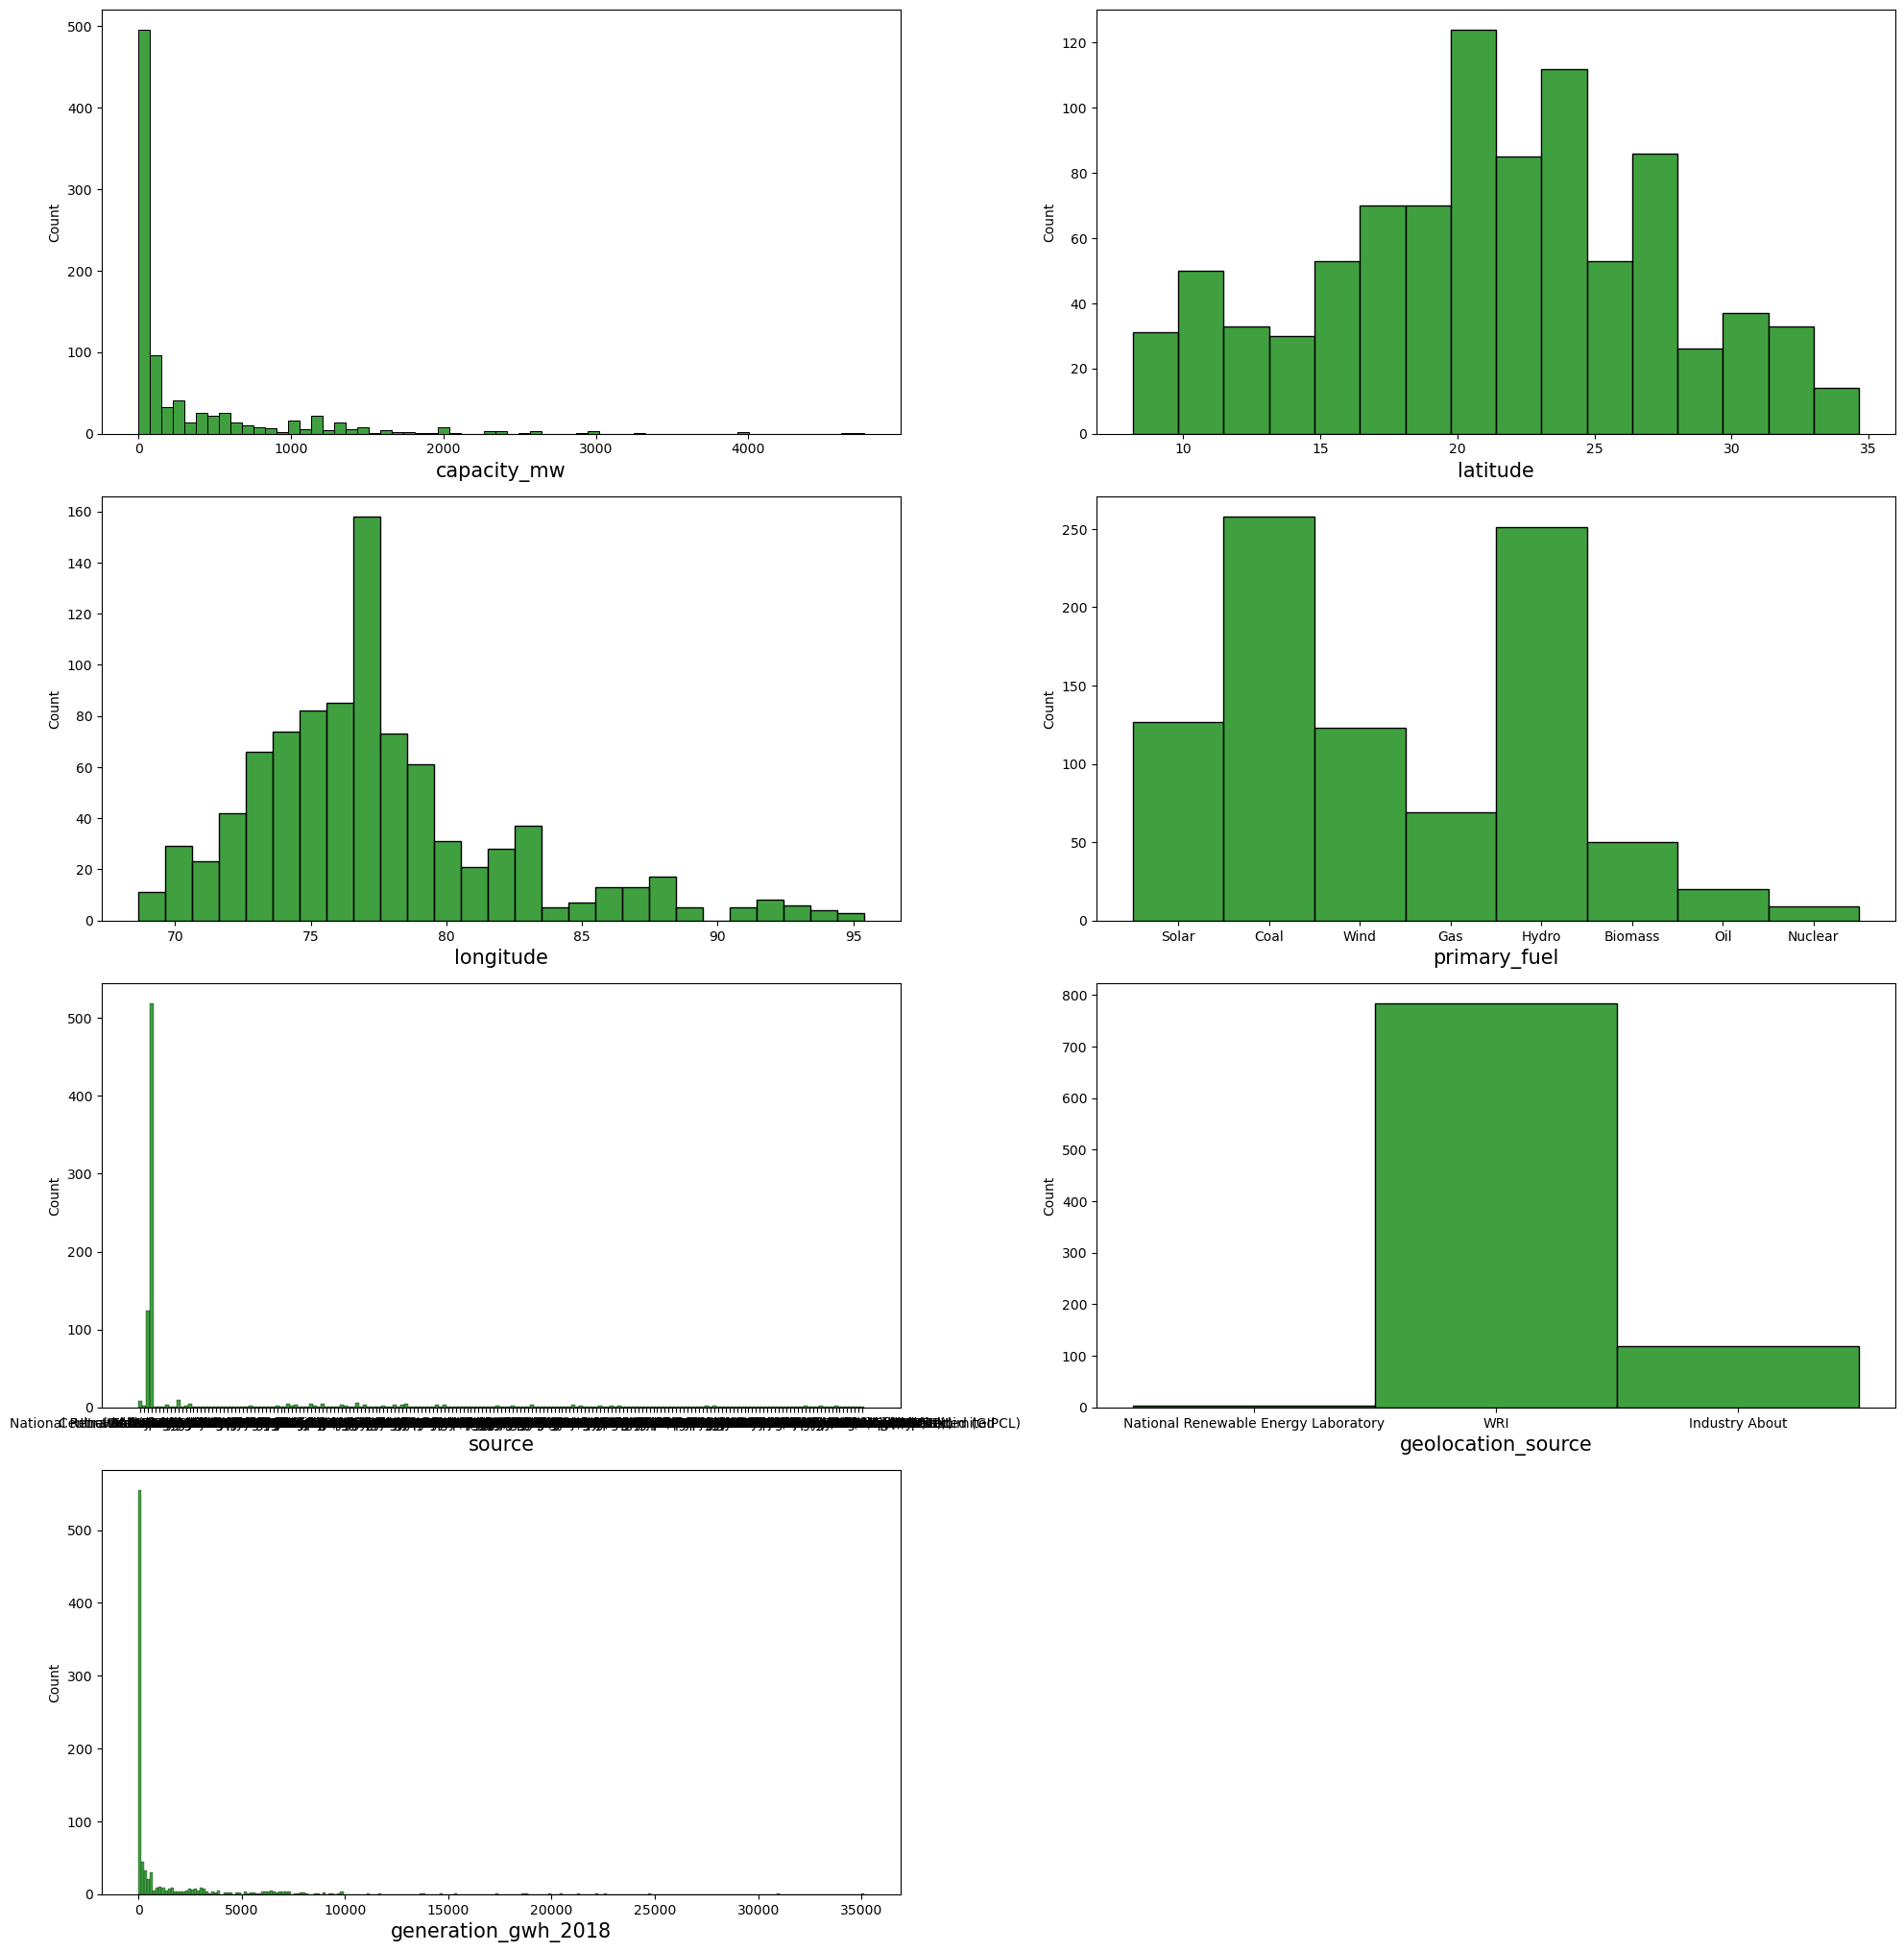

In [295]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=10:
        plt.subplot(5,2,p)
        sns.histplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='geolocation_source'>

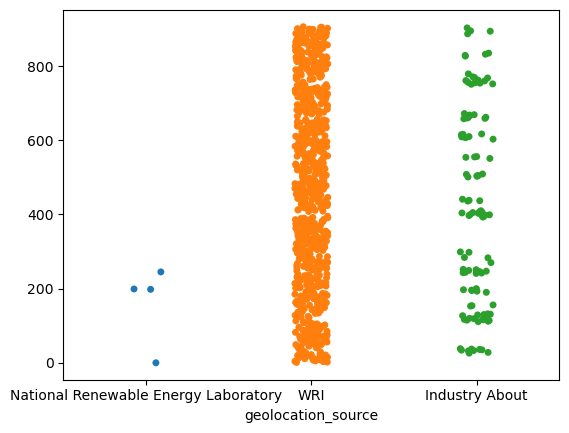

In [296]:
sns.stripplot(y=df.index,x=df['geolocation_source'])

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

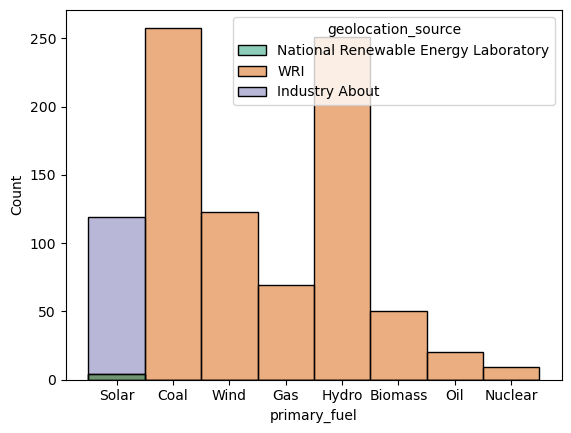

In [297]:
sns.histplot(hue=df.geolocation_source,x=df.primary_fuel,palette='Dark2')

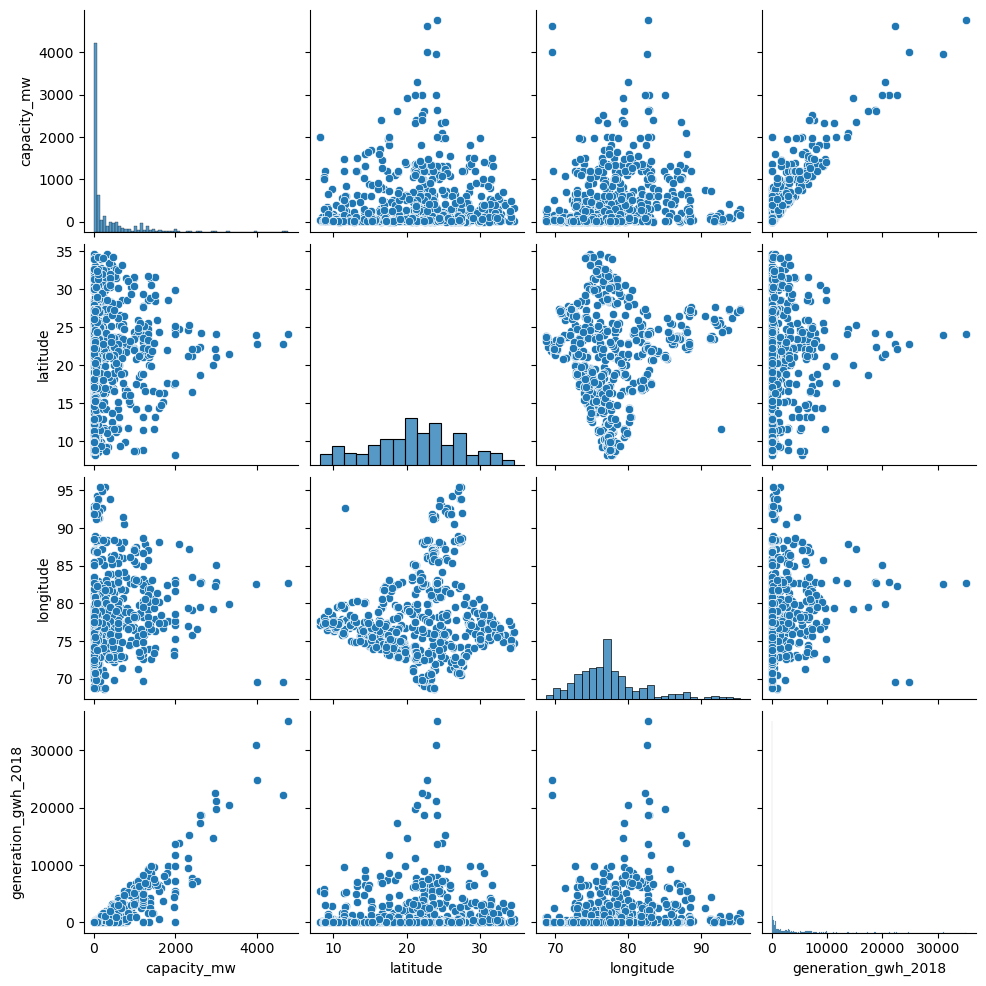

In [298]:
sns.pairplot(data=df)

In [299]:
num_col=[]
for i in df.dtypes.index:
    if df[i].dtypes!='object':
        num_col.append(i)
print(num_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2018']


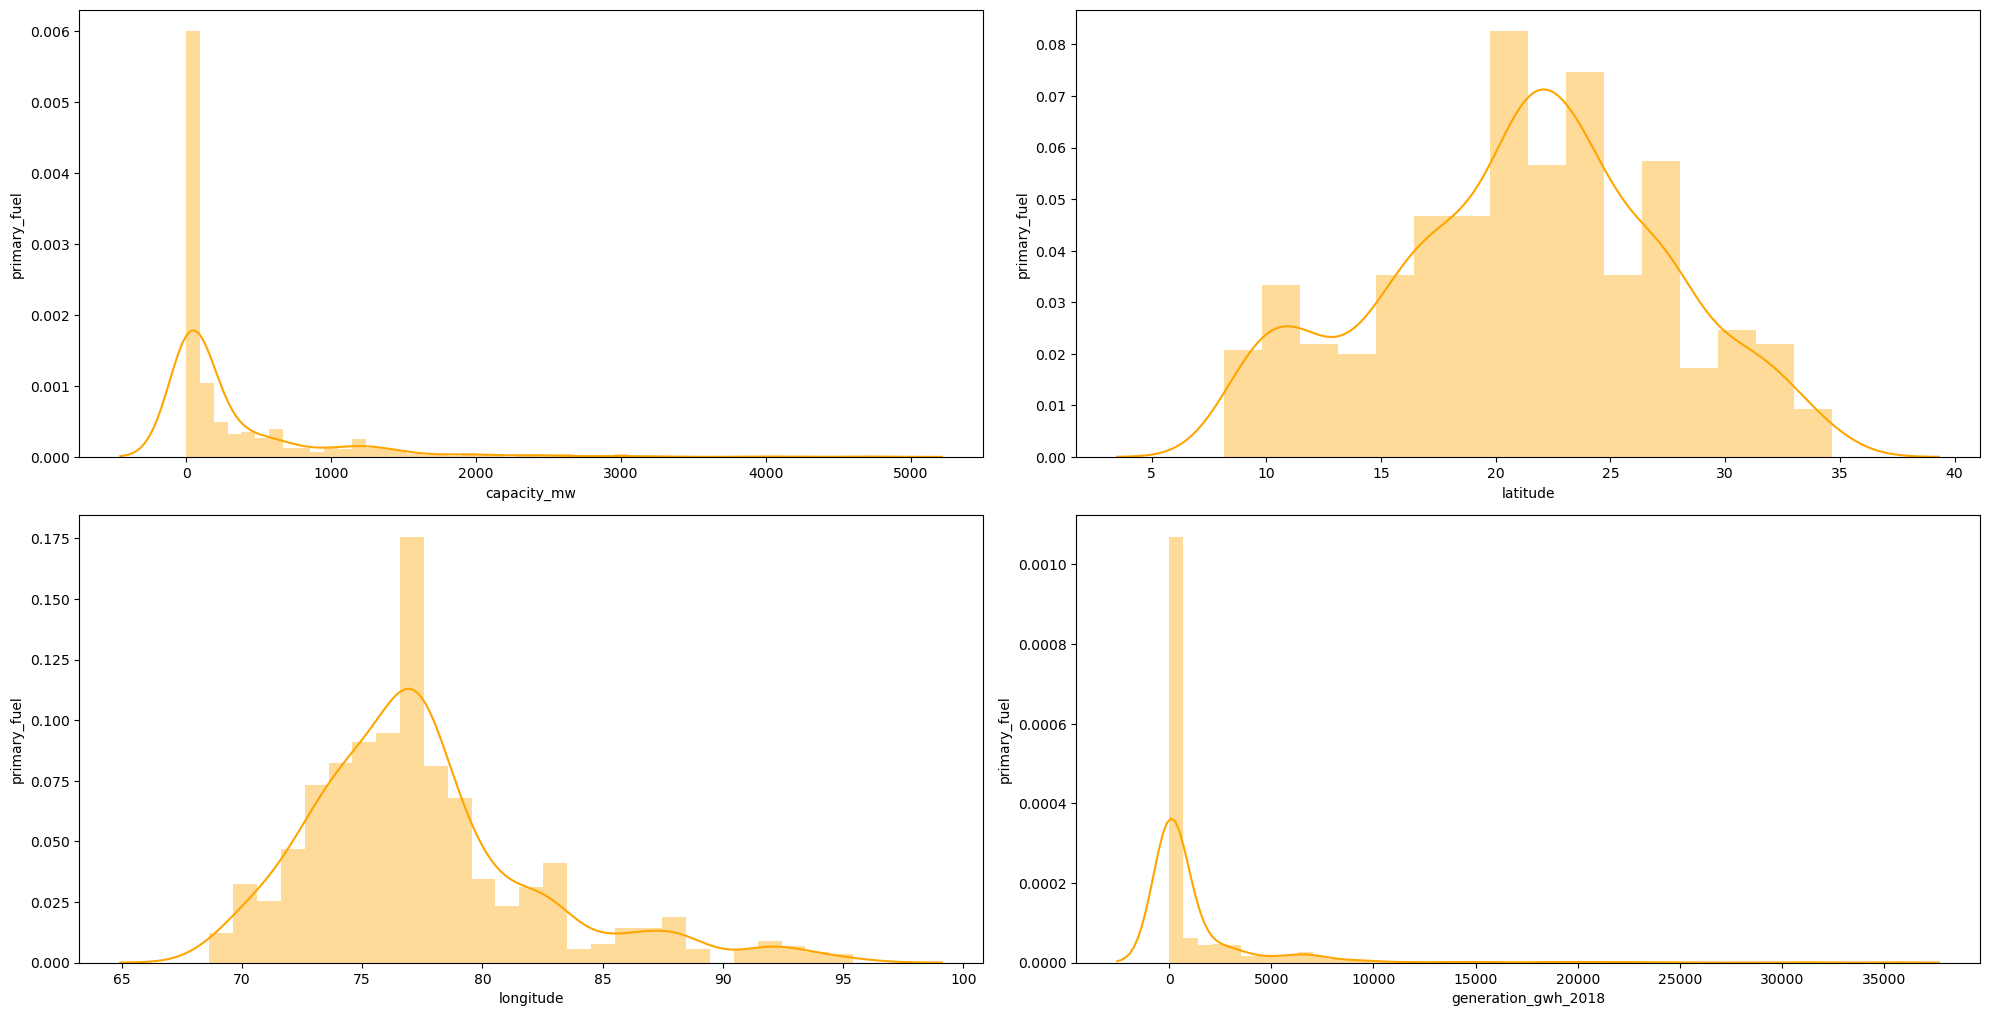

In [300]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.distplot(df[i],color='orange')
        plt.xlabel(i)
        plt.ylabel('primary_fuel')
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='primary_fuel'>

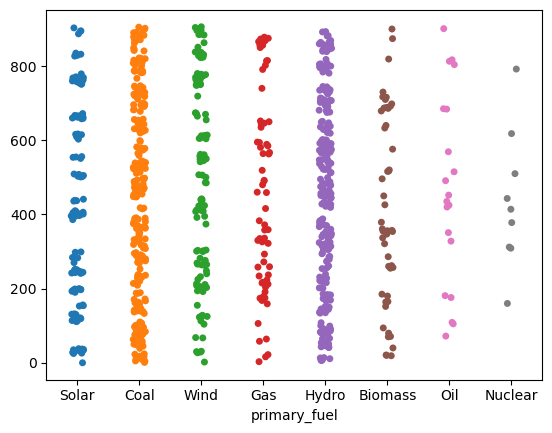

In [301]:
sns.stripplot(x=df['primary_fuel'],y=df.index,palette='tab10')

# Outliers

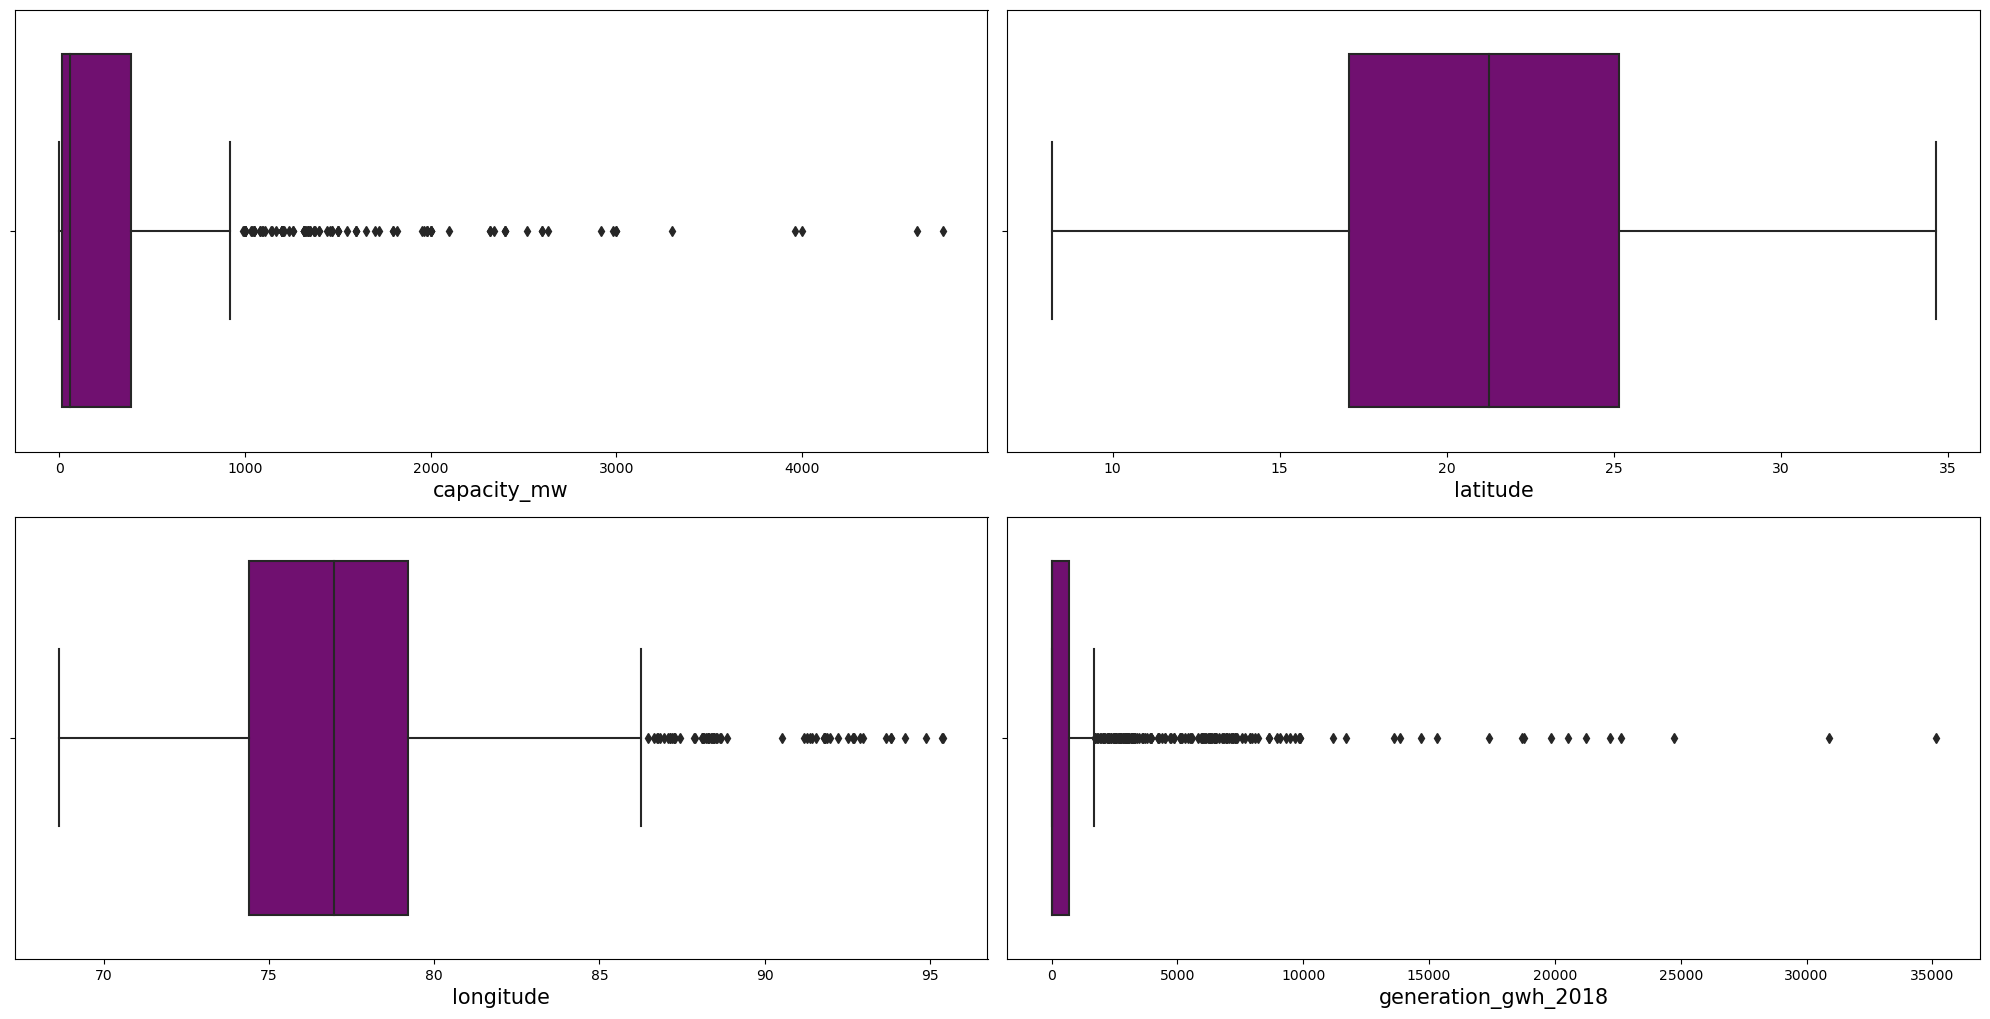

In [302]:
#Detecting outliers from numerical_column
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.boxplot(df[i],color='purple')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

In [303]:
#Removing outliers
from scipy.stats import zscore
outlier=df[['longitude','generation_gwh_2018']]
z=np.abs(zscore(outlier))
z

,longitude,generation_gwh_2018
0,0.878280,0.389703
1,0.593788,0.389703
2,1.682394,0.389703
3,2.889052,0.199729
4,1.027976,1.818441
...,...,...
902,0.022477,0.181448
903,0.145644,0.389703
904,0.391673,0.389703
905,0.772866,0.389703


In [304]:
threshold=3
print(np.where(z>3))

(array([ 15, 143, 179, 183, 209, 244, 308, 323, 333, 340, 360, 364, 416,
       427, 482, 493, 494, 499, 519, 546, 577, 638, 648, 657, 695, 721,
       724, 726, 786, 808, 818, 847, 880], dtype=int64), array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64))


In [305]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,0.000000
2,39.2,21.9038,69.3732,Wind,CDM,WRI,0.000000
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,7279.000000
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,686.500000
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,0.000000
904,25.5,15.2758,75.5811,Wind,CDM,WRI,0.000000
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,0.000000


In [306]:
print("Data loss after removing outliers is =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Data loss after removing outliers is = 3.6383682469680267


So, the data loss is only 3.63%, which means we can continue with the new dataset.

In [307]:
df=df_new
df_new

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,0.000000
2,39.2,21.9038,69.3732,Wind,CDM,WRI,0.000000
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,7279.000000
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,686.500000
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,0.000000
904,25.5,15.2758,75.5811,Wind,CDM,WRI,0.000000
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,0.000000


# Skewness

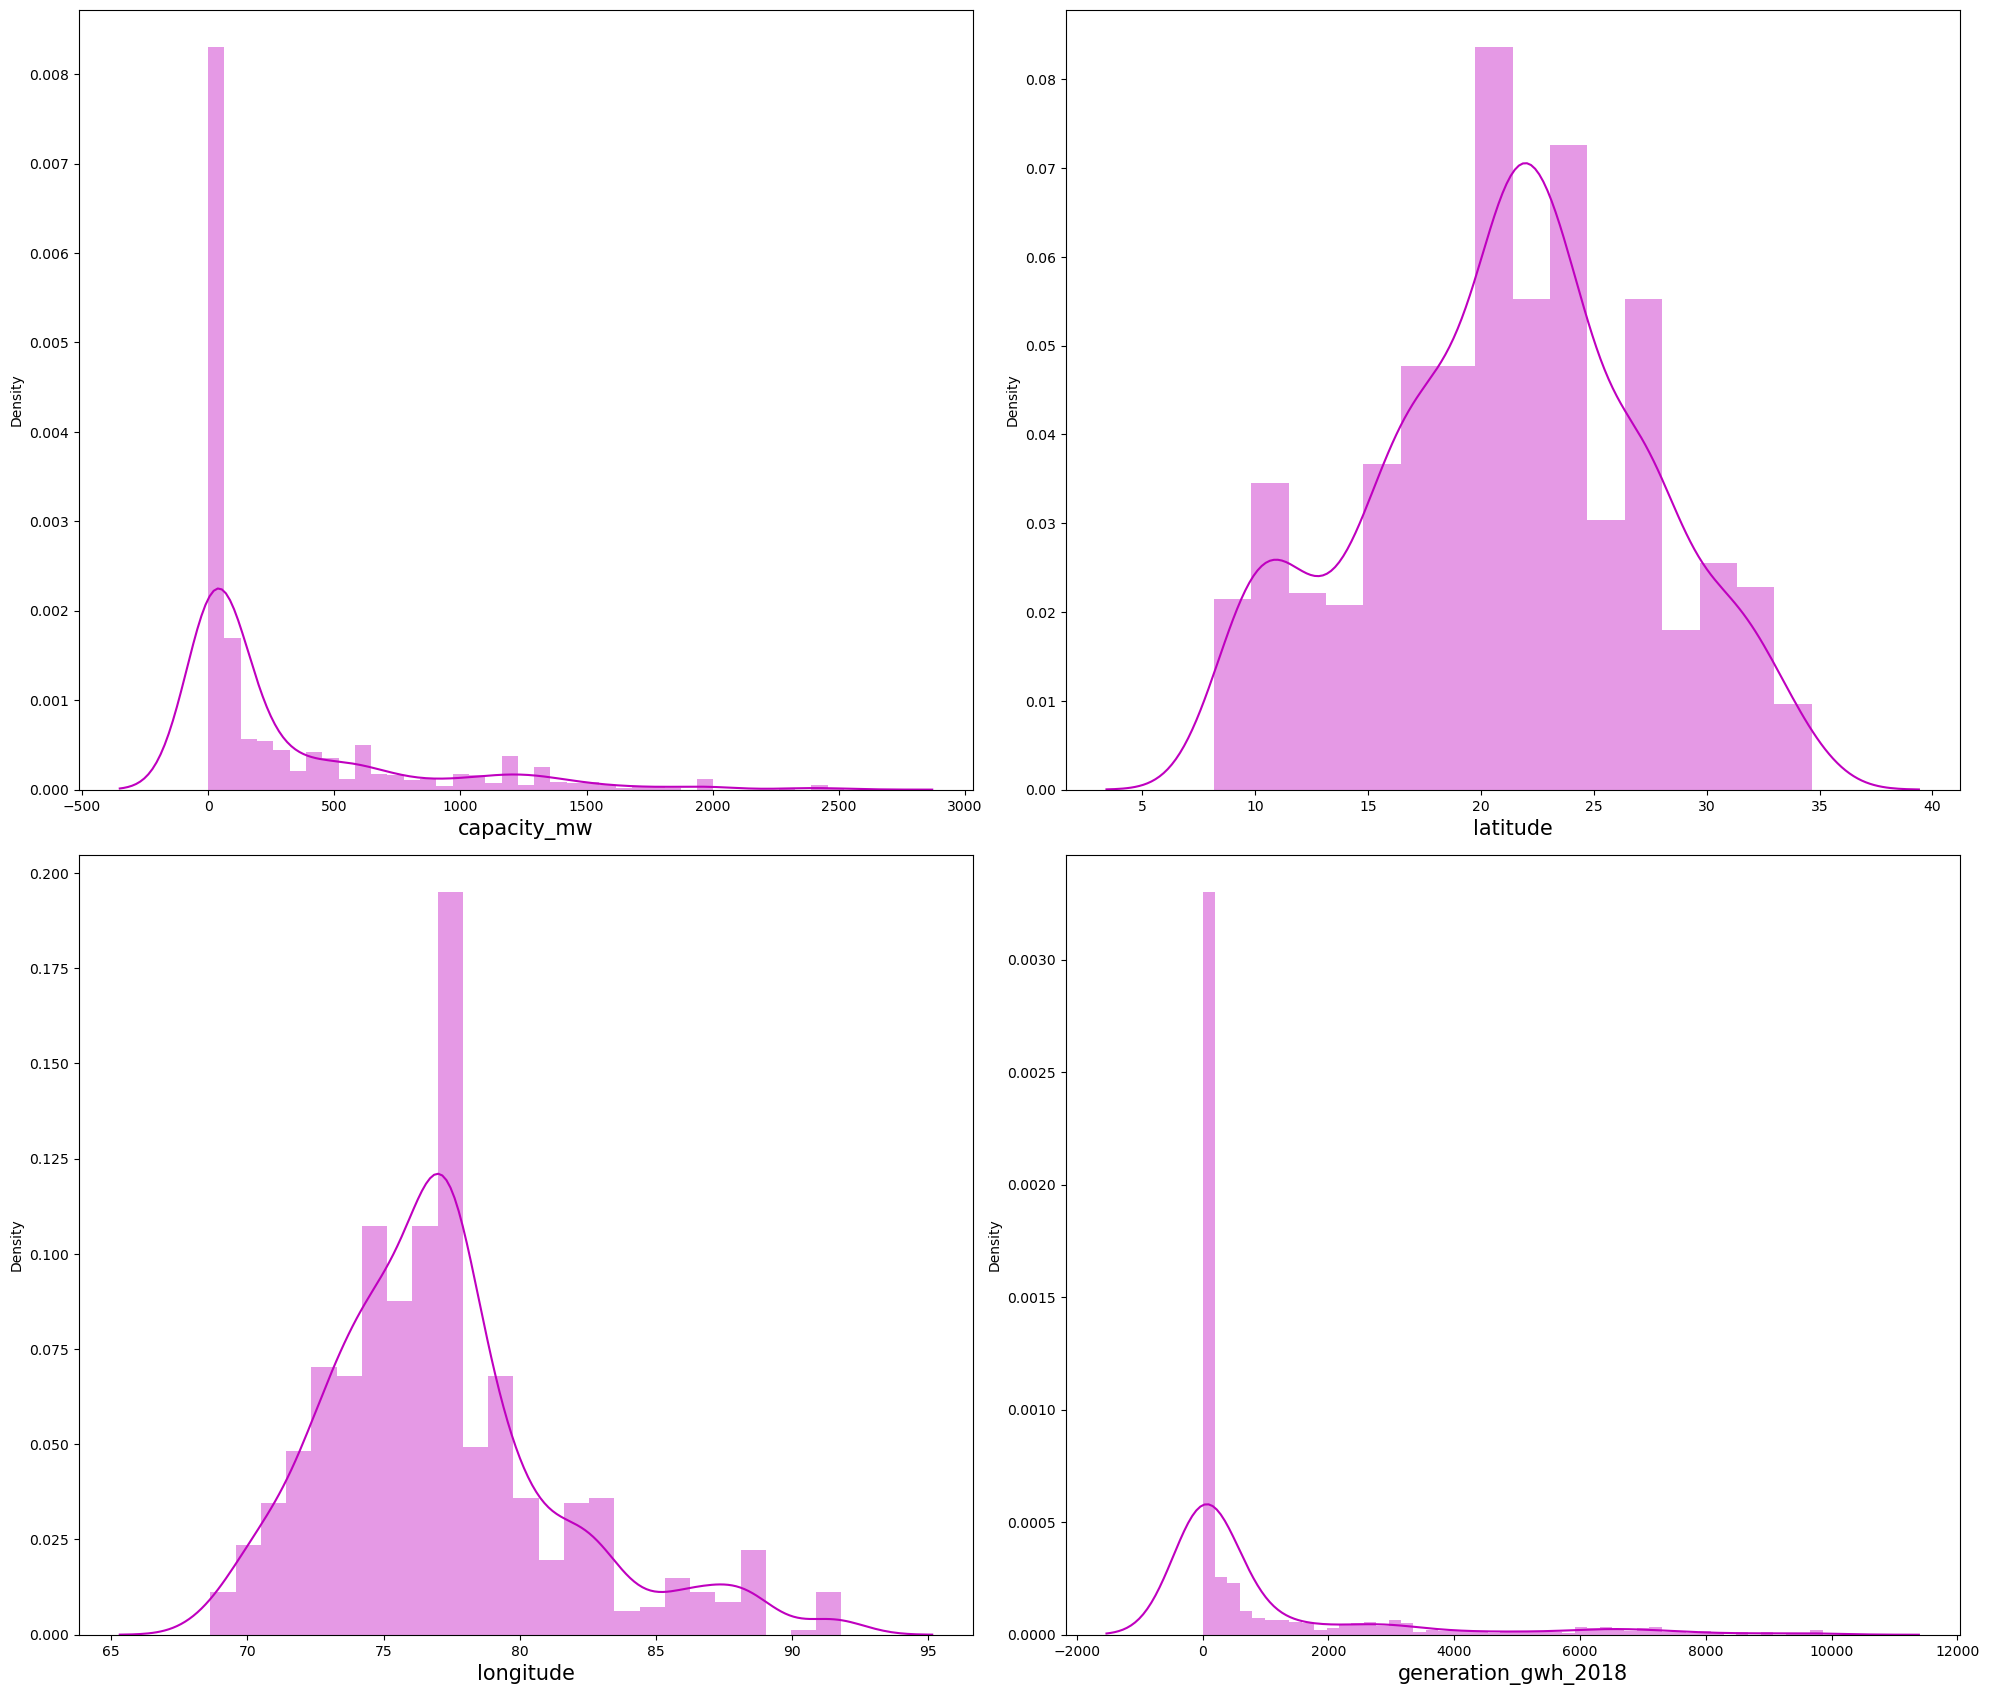

In [308]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=6:
        plt.subplot(3,2,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

In [309]:
#Removing skewness
from scipy.stats import boxcox
df['generation_gwh_2018']=boxcox(df['generation_gwh_2018'],0.5)
df.skew()

capacity_mw            2.175193
latitude              -0.110174
longitude              0.931627
generation_gwh_2018    1.522861
dtype: float64

# Encoding

In [310]:
from sklearn.preprocessing import LabelEncoder

In [311]:
le=LabelEncoder()
list=['primary_fuel','source','geolocation_source']
for i in list:
    df[i]=le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,6,109,1,-2.000000
1,98.0,24.7663,74.6090,1,174,2,-2.000000
2,39.2,21.9038,69.3732,7,21,2,-2.000000
3,135.0,23.8712,91.3602,2,22,2,48.049541
4,1800.0,21.9603,82.4091,1,22,2,168.634111


In [312]:
#separating target and feature column
x=df[['latitude','longitude','source','geolocation_source','generation_gwh_2018']]
x.head()

,latitude,longitude,source,geolocation_source,generation_gwh_2018
0,28.1839,73.2407,109,1,-2.000000
1,24.7663,74.6090,174,2,-2.000000
2,21.9038,69.3732,21,2,-2.000000
3,23.8712,91.3602,22,2,48.049541
4,21.9603,82.4091,22,2,168.634111


In [313]:
y1=df[['capacity_mw']]
y1.head()

,capacity_mw
0,2.5
1,98.0
2,39.2
3,135.0
4,1800.0


In [314]:
y2=df[['primary_fuel']]
y2.head()

,primary_fuel
0,6
1,1
2,7
3,2
4,1


# Regression model building for 'capacity_mw(y1)'

In [317]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [321]:
#finding best random_state
acc=0
rs=0
for i in range(0,200):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.33,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y1_train)
    pred=rfr.predict(x_test)
    score=r2_score(y1_test,pred)
    if score>acc:
        acc=score
        rs=i
print("Random state at",acc,"is",rs,".")

Random state at 0.8068218083974954 is 58 .


In [323]:
#creating train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.33)

In [328]:
lr=LinearRegression()
lr.fit(x_train,y1_train)
lr_pred=lr.predict(x_test)
print("R2 score =",r2_score(y1_test,lr_pred))

R2 score = 0.7360841182551457


In [327]:
ls=Lasso()
ls.fit(x,y1)
pred=ls.predict(x_test)
print("R2 score =",r2_score(y1_test,pred))

R2 score = 0.745216635123602


In [332]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y1_train)
rfr_pred=rfr.predict(x_test)
print("R2 score =",r2_score(y1_test,rfr_pred))

R2 score = 0.745216635123602


In [333]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y1_train)
dtr_pred=dtr.predict(x_test)
print("R2 score =",r2_score(y1_test,dtr_pred))

R2 score = 0.5203047651400142


In [336]:
rd=Ridge()
rd.fit(x,y1)
rd_pred=rd.predict(x_test)
print("R2 score =",r2_score(y1_test,rd_pred))

R2 score = 0.7453888916213065


# Cross_Validation

In [337]:
from sklearn.model_selection import cross_val_score

In [338]:
#finding the best k-fold
for i in range(2,25):
    score=cross_val_score(rd,x,y1,cv=i)
    print("At K-fold",i)
    print("The CV score is",score.mean())
    print("\n")

At K-fold 2
The CV score is 0.7302545822666735


At K-fold 3
The CV score is 0.7340770231131885


At K-fold 4
The CV score is 0.7344072902465343


At K-fold 5
The CV score is 0.7335444956874587


At K-fold 6
The CV score is 0.7331119423557766


At K-fold 7
The CV score is 0.7247544304662032


At K-fold 8
The CV score is 0.7339235660265451


At K-fold 9
The CV score is 0.7185980748885084


At K-fold 10
The CV score is 0.7124170442932615


At K-fold 11
The CV score is 0.7198949896038337


At K-fold 12
The CV score is 0.7284034332114294


At K-fold 13
The CV score is 0.7173957174078746


At K-fold 14
The CV score is 0.7067848896705486


At K-fold 15
The CV score is 0.7213101149398936


At K-fold 16
The CV score is 0.7075027242803194


At K-fold 17
The CV score is 0.7161285266584445


At K-fold 18
The CV score is 0.7087431354708887


At K-fold 19
The CV score is 0.7124045702020299


At K-fold 20
The CV score is 0.7099481017270648


At K-fold 21
The CV score is 0.6959012126686621


At K-fol

At k-fold 4 highest score is there, so lets continue with that.

In [339]:
rfr_score=cross_val_score(rfr,x,y1,cv=4)
print(rfr_score)
print(rfr_score.mean())
print("The difference between cv score and r2 score is =",(r2_score(y1_test,rfr_pred)-rfr_score.mean()))

[0.77271472 0.70658503 0.69374068 0.7150754 ]
0.7220289552635311
The difference between cv score and r2 score is = 0.016688567963940915


In [340]:
dtr_score=cross_val_score(dtr,x,y1,cv=4)
print(dtr_score)
print(dtr_score.mean())
print("The difference between cv score and r2 score is =",(r2_score(y1_test,dtr_pred)-dtr_score.mean()))

[0.5824362  0.58951836 0.45471106 0.55563952]
0.5455762820634157
The difference between cv score and r2 score is = -0.02527151692340146


In [341]:
rd_score=cross_val_score(rd,x,y1,cv=4)
print(rd_score)
print(rd_score.mean())
print("The difference between cv score and r2 score is =",(r2_score(y1_test,rd_pred)-rd_score.mean()))

[0.73807175 0.70992065 0.7590872  0.73054956]
0.7344072902465343
The difference between cv score and r2 score is = 0.01098160137477222


# Hyper_Parameter Tuning

In [342]:
from sklearn.model_selection import GridSearchCV

In [348]:
model=Ridge()
parameters={'alpha':[0,0.1,0.01,0.001,1,0.0001],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y1)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

GRID : GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1, 0.0001],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})
SCORE = 0.7335473754644017
{'alpha': 0.1, 'solver': 'sag'}


In [349]:
#Applying the hyper parameter tuning
rd=Ridge(alpha=0.1,solver='sag')
rd.fit(x,y1)
pred=rd.predict(x_test)
print("R2 Score =",r2_score(y1_test,pred))

R2 Score = 0.7453623459643286


In [350]:
model=RandomForestRegressor()
parameters={'n_estimators':[100,110,120,200,223],
            'criterion':['squared_error', 'absolute_error','friedman_mse','poisson']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y1)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

GRID : GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [100, 110, 120, 200, 223]})
SCORE = 0.7345756299370622
{'criterion': 'absolute_error', 'n_estimators': 110}


In [351]:
#Applying the parameters
rfr=RandomForestRegressor(n_estimators=110,criterion='absolute_error')
rfr.fit(x,y1)
pred=rfr.predict(x_test)
print("R2 score =",r2_score(y1_test,pred))

R2 score = 0.9614231320325677


So we can see after applying the parameters we received r2_score 96%. So our final model is RandomForestRegressor.

In [352]:
final_model=rfr
final_model

RandomForestRegressor(criterion='absolute_error', n_estimators=110)

# Saving and predicting final model

In [354]:
import joblib
joblib.dump(final_model,'CAPACITY_MW.pkl')

['CAPACITY_MW.pkl']

In [359]:
model=joblib.load("CAPACITY_MW.pkl")
predict=model.predict(x_test)
predict

array([ 119.08509091,   84.36218182,   13.15045455,  101.60454545,
        294.77272727,  424.72654545,  103.40454545,  142.11272727,
         77.52545455,   28.35454545,  300.28727273,  931.87818182,
         44.64545455,   23.38454545,  868.07545455, 1879.5       ,
         48.61909091,  581.68181818,   46.98818182,  308.30781818,
        605.31818182,  658.20909091, 1206.90181818,   37.43618182,
         10.67990909,   33.37090909,   31.45345455,  125.67272727,
         20.16454545,   55.27454545,   58.28181818,  427.10090909,
         12.659     ,   39.26136364,  624.81818182,  129.63272727,
         24.11627273,   84.53545455,   47.07454545,  255.90727273,
          6.68363636,  407.25381818,   57.22272727,    5.        ,
         29.40545455,   99.80181818,  126.51454545,   53.85181818,
        511.95454545,   38.95909091,  380.48709091,  108.51636364,
         94.94318182,  186.19136364,   31.36636364,   54.31454545,
         19.99454545,    9.58363636,   19.99454545,    6.82727

In [360]:
a=np.array(y1_test)
actual=a.flatten()
actual

array([1.07880e+02, 9.60000e+01, 4.00000e+00, 1.20000e+02, 2.10000e+02,
       4.00000e+02, 1.10000e+02, 9.00000e+01, 8.00000e+01, 1.70000e+01,
       2.31000e+02, 7.50000e+02, 3.37500e+01, 2.20000e+01, 1.20000e+03,
       2.40000e+03, 4.55000e+01, 6.00000e+02, 5.07000e+01, 1.80000e+02,
       5.10000e+02, 6.00000e+02, 1.20000e+03, 3.00000e+01, 5.00000e+00,
       3.07500e+01, 1.89000e+01, 2.50000e+01, 2.10000e+01, 6.96000e+01,
       4.50000e+01, 6.00000e+02, 4.50000e+00, 4.10000e+01, 5.00000e+02,
       2.21000e+02, 1.10000e+01, 1.00000e+02, 4.00000e+01, 3.00000e+02,
       3.00000e+00, 4.60000e+02, 5.40000e+01, 5.00000e+00, 3.60000e+01,
       9.70000e+01, 1.50000e+02, 1.50000e+01, 4.20000e+02, 1.50000e+01,
       3.47500e+02, 9.00000e+01, 1.50000e+02, 1.00000e+02, 1.87000e+01,
       1.50000e+01, 7.40000e+01, 2.00000e+00, 2.76500e+01, 5.00000e+00,
       4.40000e+02, 1.25000e+01, 6.00000e+01, 1.72000e+03, 3.00000e+01,
       2.34000e+02, 5.00000e+01, 7.68000e+02, 1.00000e+01, 2.500

In [363]:
ds=pd.DataFrame({'Actual_Value':actual,"Predicted_Value":predict})
ds.sample(10)

,Actual_Value,Predicted_Value
258,1110.00,1181.969636
0,107.88,119.085091
106,5.00,5.000000
2,4.00,13.150455
165,427.50,523.927273
245,12.00,15.005000
19,180.00,308.307818
189,1340.00,1387.090909
142,5.00,5.140909
170,50.00,90.608182


# Classification Model of 'Primary_Fuel(y2)'

In [366]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [368]:
#finding the best random_state
acc=0
rs=0
for i in range(0,200):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.33,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y2_train)
    pred=rf.predict(x_test)
    score=accuracy_score(y2_test,pred)
    if score>acc:
        acc=score
        rs=i
print("Maximum accuracy score at random state",rs,"is",acc,".")

Maximum accuracy score at random state 56 is 0.8823529411764706 .


In [369]:
#creating train_test_split
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.33,random_state=rs)

In [373]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y2_train)
rfc_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y2_test,rfc_pred))
print("\n")
print("Classification_report\n",classification_report(y2_test,rfc_pred))
print("Confusion Matrix\n",confusion_matrix(y2_test,rfc_pred))

Accuracy Score = 0.8823529411764706


Classification_report
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.84      0.83        74
           2       0.56      0.56      0.56        16
           3       0.89      0.91      0.90        87
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        52

    accuracy                           0.88       289
   macro avg       0.70      0.67      0.68       289
weighted avg       0.88      0.88      0.88       289

Confusion Matrix
 [[11  3  0  0  0  0  0  0]
 [ 2 62  5  4  0  0  1  0]
 [ 0  4  9  3  0  0  0  0]
 [ 0  6  1 79  0  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 52]]


In [376]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y2_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y2_test,dtc_pred))
print("Classification_report\n",classification_report(y2_test,dtc_pred))
print("Confusion Matrix\n",confusion_matrix(y2_test,dtc_pred))

Accuracy Score = 0.8269896193771626
Classification_report
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.71      0.80      0.75        74
           2       0.53      0.50      0.52        16
           3       0.85      0.78      0.81        87
           4       0.00      0.00      0.00         1
           5       0.40      0.50      0.44         4
           6       0.95      1.00      0.98        41
           7       1.00      1.00      1.00        52

    accuracy                           0.83       289
   macro avg       0.66      0.65      0.65       289
weighted avg       0.83      0.83      0.83       289

Confusion Matrix
 [[ 9  5  0  0  0  0  0  0]
 [ 2 59  3  6  0  2  2  0]
 [ 0  5  8  3  0  0  0  0]
 [ 0 14  4 68  0  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 52]]


In [377]:
sv=SVC()
sv.fit(x_train,y2_train)
sv_pred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y2_test,sv_pred))
print("Classification_report\n",classification_report(y2_test,sv_pred))
print("Confusion Matrix\n",confusion_matrix(y2_test,sv_pred))

Accuracy Score = 0.6470588235294118
Classification_report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.81      0.68      0.74        74
           2       0.00      0.00      0.00        16
           3       0.84      0.62      0.72        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.58      0.76      0.66        41
           7       0.47      1.00      0.64        52

    accuracy                           0.65       289
   macro avg       0.34      0.38      0.34       289
weighted avg       0.63      0.65      0.61       289

Confusion Matrix
 [[ 0  2  0  0  0  0  9  3]
 [ 0 50  0  5  0  0 10  9]
 [ 0  2  0  5  0  0  2  7]
 [ 0  6  0 54  0  0  0 27]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  3]
 [ 0  2  0  0  0  0 31  8]
 [ 0  0  0  0  0  0  0 52]]


# Cross_Validation

In [378]:
#finding the best k-fold value
for i in range(2,25):
    score=cross_val_score(rfc,x,y2,cv=i)
    print("At k-fold",i,"cv score =",score.mean())
    print("\n")

At k-fold 2 cv score = 0.8077803203661327


At k-fold 3 cv score = 0.8146369784556481


At k-fold 4 cv score = 0.8249130744417913


At k-fold 5 cv score = 0.8237963875205254


At k-fold 6 cv score = 0.8215084238702567


At k-fold 7 cv score = 0.8295115207373271


At k-fold 8 cv score = 0.8249165971643035


At k-fold 9 cv score = 0.83639572667555


At k-fold 10 cv score = 0.8180512016718915


At k-fold 11 cv score = 0.8225690448791716


At k-fold 12 cv score = 0.834173642820903


At k-fold 13 cv score = 0.8249476598905925


At k-fold 14 cv score = 0.8318155219076877


At k-fold 15 cv score = 0.8294954217806352


At k-fold 16 cv score = 0.8351851851851851


At k-fold 17 cv score = 0.83648300949339


At k-fold 18 cv score = 0.8340655706727136


At k-fold 19 cv score = 0.8386727688787186


At k-fold 20 cv score = 0.8350951374207188


At k-fold 21 cv score = 0.8386704275206017


At k-fold 22 cv score = 0.8351689976689979


At k-fold 23 cv score = 0.8306636155606408


At k-fold 24 cv score =

so we are getting maximum score at k-fold 21.

In [379]:
rfc_score=cross_val_score(rfc,x,y2,cv=21)
print(rfc_score)
print(rfc_score.mean())
print("The difference between r2 score and cv score is =",(r2_score(y2_test,rfc_pred))-rfc_score.mean())

[0.83333333 0.80952381 0.83333333 0.92857143 0.85714286 0.78571429
 0.83333333 0.85714286 0.85714286 0.88095238 0.83333333 0.80952381
 0.83333333 0.85365854 0.82926829 0.7804878  0.82926829 0.85365854
 0.80487805 0.85365854 0.82926829]
0.8374536806592557
The difference between r2 score and cv score is = 0.0966688650826445


In [381]:
dtc_score=cross_val_score(dtc,x,y2,cv=21)
print(dtc_score)
print(dtc_score.mean())
print("The difference between r2 score and cv score is =",(r2_score(y2_test,dtc_pred))-dtc_score.mean())

[0.83333333 0.76190476 0.78571429 0.9047619  0.83333333 0.80952381
 0.83333333 0.83333333 0.76190476 0.95238095 0.83333333 0.80952381
 0.76190476 0.80487805 0.82926829 0.7804878  0.85365854 0.85365854
 0.80487805 0.82926829 0.87804878]
0.8261158121785299
The difference between r2 score and cv score is = 0.05028553554674953


# Hyper_Parameter Tuning

In [382]:
model=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y2)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

GRID : GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})
SCORE = 0.7836978653530376
{'criterion': 'gini', 'splitter': 'best'}


In [383]:
#Applying the parameter
dtc=DecisionTreeClassifier(criterion='gini',splitter='best')
dtc.fit(x,y2)
pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y2_test,pred))

Accuracy Score = 1.0


We achieved a result of 1.0, so this is our final model.

In [400]:
final_model=dtc
final_model

DecisionTreeClassifier()

# Saving and predicting final model

In [402]:
joblib.dump(final_model,"PRIMARY_FUEL.pkl")

['PRIMARY_FUEL.pkl']

In [403]:
model=joblib.load("PRIMARY_FUEL.pkl")
prediction=model.predict(x_test)
prediction

array([1, 6, 6, 3, 6, 1, 7, 7, 3, 1, 1, 1, 3, 1, 7, 1, 6, 7, 3, 7, 2, 7,
       1, 7, 3, 3, 7, 1, 3, 3, 6, 3, 1, 3, 3, 4, 7, 3, 7, 3, 3, 1, 7, 6,
       7, 3, 3, 3, 7, 7, 7, 6, 3, 1, 7, 3, 6, 2, 2, 6, 3, 6, 3, 7, 0, 7,
       3, 6, 1, 3, 3, 1, 0, 1, 1, 6, 6, 5, 7, 2, 7, 3, 3, 0, 3, 1, 7, 1,
       7, 7, 3, 1, 6, 3, 1, 1, 3, 5, 1, 7, 3, 3, 1, 1, 1, 7, 1, 1, 1, 6,
       6, 3, 3, 6, 3, 3, 3, 5, 1, 3, 1, 7, 7, 6, 7, 1, 2, 1, 6, 3, 3, 3,
       1, 7, 1, 5, 7, 1, 1, 7, 1, 1, 1, 1, 3, 6, 7, 1, 2, 7, 3, 3, 6, 7,
       3, 1, 3, 0, 2, 3, 1, 6, 3, 3, 3, 0, 6, 3, 3, 1, 1, 3, 7, 3, 6, 6,
       0, 6, 1, 7, 1, 6, 0, 2, 3, 7, 3, 3, 1, 1, 3, 3, 1, 2, 6, 3, 7, 7,
       2, 0, 3, 3, 0, 6, 3, 6, 3, 6, 3, 1, 3, 3, 3, 3, 7, 6, 1, 3, 3, 1,
       1, 1, 0, 2, 6, 7, 7, 0, 3, 3, 0, 3, 3, 1, 2, 3, 1, 1, 6, 1, 1, 3,
       0, 1, 6, 2, 1, 1, 3, 2, 1, 2, 7, 3, 7, 6, 1, 3, 7, 1, 1, 1, 3, 7,
       6, 3, 3, 6, 6, 7, 3, 1, 3, 2, 1, 1, 7, 3, 7, 7, 0, 3, 1, 6, 1, 7,
       1, 7, 6])

In [408]:
a=np.array(y2_test)
actual=a.flatten()
actual

array([1, 6, 6, 3, 6, 1, 7, 7, 3, 1, 1, 1, 3, 1, 7, 1, 6, 7, 3, 7, 2, 7,
       1, 7, 3, 3, 7, 1, 3, 3, 6, 3, 1, 3, 3, 4, 7, 3, 7, 3, 3, 1, 7, 6,
       7, 3, 3, 3, 7, 7, 7, 6, 3, 1, 7, 3, 6, 2, 2, 6, 3, 6, 3, 7, 0, 7,
       3, 6, 1, 3, 3, 1, 0, 1, 1, 6, 6, 5, 7, 2, 7, 3, 3, 0, 3, 1, 7, 1,
       7, 7, 3, 1, 6, 3, 1, 1, 3, 5, 1, 7, 3, 3, 1, 1, 1, 7, 1, 1, 1, 6,
       6, 3, 3, 6, 3, 3, 3, 5, 1, 3, 1, 7, 7, 6, 7, 1, 2, 1, 6, 3, 3, 3,
       1, 7, 1, 5, 7, 1, 1, 7, 1, 1, 1, 1, 3, 6, 7, 1, 2, 7, 3, 3, 6, 7,
       3, 1, 3, 0, 2, 3, 1, 6, 3, 3, 3, 0, 6, 3, 3, 1, 1, 3, 7, 3, 6, 6,
       0, 6, 1, 7, 1, 6, 0, 2, 3, 7, 3, 3, 1, 1, 3, 3, 1, 2, 6, 3, 7, 7,
       2, 0, 3, 3, 0, 6, 3, 6, 3, 6, 3, 1, 3, 3, 3, 3, 7, 6, 1, 3, 3, 1,
       1, 1, 0, 2, 6, 7, 7, 0, 3, 3, 0, 3, 3, 1, 2, 3, 1, 1, 6, 1, 1, 3,
       0, 1, 6, 2, 1, 1, 3, 2, 1, 2, 7, 3, 7, 6, 1, 3, 7, 1, 1, 1, 3, 7,
       6, 3, 3, 6, 6, 7, 3, 1, 3, 2, 1, 1, 7, 3, 7, 7, 0, 3, 1, 6, 1, 7,
       1, 7, 6])

In [409]:
ds=pd.DataFrame({"Actual Value":actual,"Predicted Value":prediction})
ds

,Actual Value,Predicted Value
0,1,1
1,6,6
2,6,6
3,3,3
4,6,6
...,...,...
284,1,1
285,7,7
286,1,1
287,7,7


We can see our model is performing really well.

# ***END***